# QR Code
[view statically on Github](https://github.com/YoraiLevi/Problems_From_The_Discrete_To_The_Continuous_Chapter_3_Probabilistic_Packing_Problem/blob/main/Chapter_3.ipynb) (Latex may not render correctly)  
[view interactively on Colab](https://colab.research.google.com/github/YoraiLevi/Problems_From_The_Discrete_To_The_Continuous_Chapter_3_Probabilistic_Packing_Problem/blob/main/Chapter_3.ipynb)  
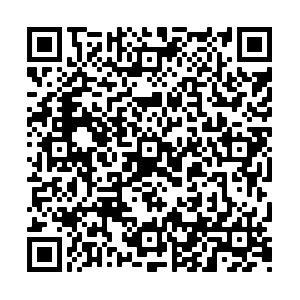

#Code
minimize label and run

In [ ]:
#@title pk
import numpy as np
import scipy.integrate as integrate

def _pk(k=2):
  def reciprical_poly(start,end):
      return np.polynomial.polynomial.Polynomial(np.concatenate((np.zeros(max(start,0)),np.reciprocal(np.arange(start,end+1,dtype=np.dtype(float))))))
  return k*np.exp(-2*reciprical_poly(1,k-1)(1))*integrate.quad(lambda x: np.exp(2*reciprical_poly(1,k-1)(x)), 0, 1)[0]
pk = np.vectorize(_pk)

In [ ]:
#@title
import random
# random.seed(1)
def nearest_neighbors(index,k,line):
  """returns a window of size k of the nearest unbounded neightbors
  0: unbounded
  method: build the larger window - left or right possible
  try left: reached !0 or start? skip
  start_index = start_index-1
  try right: reached !0 or end? skip
  end_index = end_index+1
  stop when both fail end_index-start_index+1 == k 
  """
  if(line[index]!=0):
    return None
  start_index = index
  end_index = index
  while True:
    #print("start_index,end_index:",start_index,end_index)
    can_expand_left = (start_index-1) >= 0 and line[(start_index-1)] == 0 
    #print("can_expand_left",can_expand_left)
    can_expand_right = (end_index+1) < len(line) and line[(end_index+1)] == 0
    #print("can_expand_right",can_expand_right)
    current_window_sum = end_index-start_index+1
    #print("current_window_sum",current_window_sum)
    if(current_window_sum==k):
      break
    if(not can_expand_left and not can_expand_right):
      break
    if(can_expand_left and current_window_sum!=k):
      start_index = start_index-1
      current_window_sum = current_window_sum+1
    if(can_expand_right and current_window_sum!=k):
      end_index = end_index+1
      current_window_sum = current_window_sum+1
  if(end_index-start_index+1 == k):
    return (start_index,end_index)
  return None
def run(n,k):
  line = [0]*n
  steps = [line.copy()]
  step = 1
  def step_choices():
    for index in (index for index,value in enumerate(line) if value == 0):
      window = nearest_neighbors(index,k,line)
      if window!=None:
        yield (index,window)
  avail_choices = list(step_choices())
  while (avail_choices):
    choice = random.choice(avail_choices)
    for i in range(choice[1][0],choice[1][1]+1):
      line[i] = step
    step = step+1
    steps.append(line.copy())
    avail_choices = list(step_choices())
  return steps
# for index,molecule in enumerate(line):
  # print(index, nearest_neighbors(index,k,line))

In [ ]:
#@title experiment code (recursive)
import random
# random.seed(1)
def run_recursive(n,k):
  step = 0
  def r_call(length,k):
    """
    [0 <= left := choice-k//2 <= length-k ... k ... right := length-k-left] 
    [0,0,0,...,0,i,...,i,0,...,0,0,0]
    """
    def clamp(clamp_min,clamp_max,value):
      """Clamps value to range"""
      return min(clamp_max, max(clamp_min, value))
    if(length<k):
        return [0]*length
    j = random.randrange(1,length-k+2)
    left_len = j-1
    right_len = length+1-j-k
    nonlocal step
    step +=1
    # print(choice,left_len,right_len,length,k) #debug
    bonded= [step]*k
    return r_call(left_len,k)+bonded+r_call(right_len,k)
  return r_call(n,k) 
def create_steps(last_step):
  step = max(last_step)
  steps = []
  for i in reversed(range(step)):
    steps.append(last_step)
    last_step = [x if x<i else 0 for x in last_step ]
  steps.reverse()
  return steps

In [ ]:
#@title
import random
# random.seed(1)
def run_recursive_fast_molecules(n,k):
  step = 0
  def r_call(length,k):
    """
    [0 <= left := choice-k//2 <= length-k ... k ... right := length-k-left] 
    [0,0,0,...,0,i,...,i,0,...,0,0,0]
    """
    def clamp(clamp_min,clamp_max,value):
      """Clamps value to range"""
      return min(clamp_max, max(clamp_min, value))
    if(length<k):
        return 0
    choice = random.randrange(length)
    left_len = clamp(0,length-k,choice-k//2)
    right_len = length-k-left_len
    # print(choice,left_len,right_len,length,k) #debug
    return r_call(left_len,k)+k+r_call(right_len,k)
  return r_call(n,k)

In [ ]:
#@title experiment code (recursive-fast)
import random
# random.seed(1)
def run_recursive_fast(n,k):
  step = 0
  def r_call(length,k):
    """
    [0 <= left := choice-k//2 <= length-k ... k ... right := length-k-left] 
    [0,0,0,...,0,i,...,i,0,...,0,0,0]
    """
    def clamp(clamp_min,clamp_max,value):
      """Clamps value to range"""
      return min(clamp_max, max(clamp_min, value))
    if(length<k):
        return 0
    try:
      j = random.randrange(1,length-k+2)
      left_len = j-1
      right_len = length+1-j-k
      # print(choice,left_len,right_len,length,k) #debug
      return (r_call(left_len,k)+k+r_call(right_len,k))
    except Exception as e:
      print(1,length-k+1,length,k)
      raise e
  return r_call(n,k)/n

In [ ]:
#@title render code
import numpy
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
 
def render_line(ax,line,height=1):
  def chunk(line):
    start_index = 0    
    while start_index<len(line):
      end_index = start_index       
      while end_index+1<len(line) and line[end_index+1]!=0 and line[end_index+1]==line[end_index]:
        end_index=end_index+1
      yield (start_index,end_index)
      start_index = end_index +1
  for c in chunk(line):
    if (c[1]-c[0]==0):
      render_chunk(ax,c,height,color='blue')
    else:
      render_chunk(ax,c,height,color='purple')
def render_chunk(ax,c,height=1,color='red'):
    # gets tuple representing closed set
    start,end = c
    ax.plot(range(start,end+1),[height]*(end-start+1),marker=".",color=color)
 
def render_experiment(steps):
  fig, ax = plt.subplots(len(steps))
  ax = [ax] if type(ax) is not numpy.ndarray else ax
  for step,line in enumerate(steps):
    # ax[step].set_title('Step {}'.format(step))
 
 
    legend_elements = [Line2D([0], [0],marker='o', color='grey', label='Possible Bond'),
                      Line2D([0], [0],marker='o', color='purple', label='Bonded'),
                      Line2D([0], [0],marker='o', color='white',markerfacecolor='blue', label='Not Bonded'),
                      Line2D([0], [0],marker='o', color='white', label='N = {}'.format(n)),
                      Line2D([0], [0],marker='o', color='white', label='K = {}'.format(k)),
                      Line2D([0], [0],marker='o', color='white', label='Bonded Atoms = {}'.format(step*k)),
                      Line2D([0], [0],marker='o', color='white', label='% Bonded = {}'.format((step*k)/n*100)),
 
 
                      ]
    ax[step].legend(handles=legend_elements, bbox_to_anchor=(1, 1),loc='upper left')
 
 
    render_line(ax[step],line,step)
    chunks = [nearest_neighbors(index,k,line) for index in range(len(line))]
    chunks_temp = [chunks[0]]
    for i,c in enumerate(chunks[1:]):
      if chunks[i] == c:
        chunks_temp.append(None)
      else:
        chunks_temp.append(c)
    chunks = chunks_temp
    chunks = list(map(lambda c : c if c else (-1,-2),chunks))
    sets = list(enumerate([frozenset(range(start,end+1)) for start,end in chunks]))
    offset = 1
    offsets = [offset]
    for i,s in sets:
      if i!=0:
        if len(s.intersection(sets[i-1])):
          offsets.append(offsets[len(offsets)-1]+1)
        else:
          offsets.append(offset)
    for index,molecule in enumerate(line):
      c = chunks[index] 
      if c:
        render_chunk(ax[step],c,step+offsets[index]/(max(offsets)+1),color='grey')
 
 
  fig.set_size_inches(15, 2.5*len(steps));
  # return fig

In [ ]:
#@title
!pip install pebble 

from pebble import ProcessPool
from concurrent.futures import TimeoutError
import time
import numpy
def work(n,k):
  Mnk = run_recursive_fast(n,k)
  return ((k,(n,Mnk)))
# import time
# s = time.time()

#%prun for n,k in vars(): work(n,k)
# e = time.time()
# print(e-s)
def batch_exp(vars,timeout=30):
  results = []
  with ProcessPool() as pool:
      future = pool.map(work, *zip(*vars),chunksize=1)
      try:
        s = time.time()
        for result in future.result():
          results.append(result)
          if (time.time()-s>timeout):
            raise TimeoutError()
          # print(result)
        # results = list(future.result())
      except TimeoutError:
          print("TimeoutError: aborting remaining computations")
          s = time.time()

          future.cancel()
          e = time.time()
          print(e-s)
  return results

#The Problem
"Consider n molecules lined up in a row. From among the $n-1$ nearest neighbor
pairs, select one pair at random and “bond” the two molecules together. Now from
all the remaining nearest neighbor pairs, select one pair at random and bond the
two molecules together. Continue like this until no nearest neighbor pairs remain"  

##Introduction:
Lets run the experiment:
In these graphs we can see a demonstration of this procedure.  
We have a 1D row of "atoms" (blue dots) and for each step we choose one molecule (floating grey) to bond.  
In the next step we cannot bond already bonded atoms, thus they're marked bonded with purple.

As all math lecture we must first start with a bunch of definitions:


*   $k$ - The length of a molecule
*   $n$ - the length of a row for atoms
*   $M_{n;k}$ - the number of bonded atoms in an experiment ($k$ * number of molecules) in a row of $n$ atoms
*   $H_n=H_n^{(k)}=EM_{n;k}$ - the expected number of bonded atoms in a row of $n$ atoms
    * $L_n=L_n^{(k)}=EM^2_{n;k}$
*   $p_k$ - the expected portion of bonded atoms from all atoms when molecule length $k$



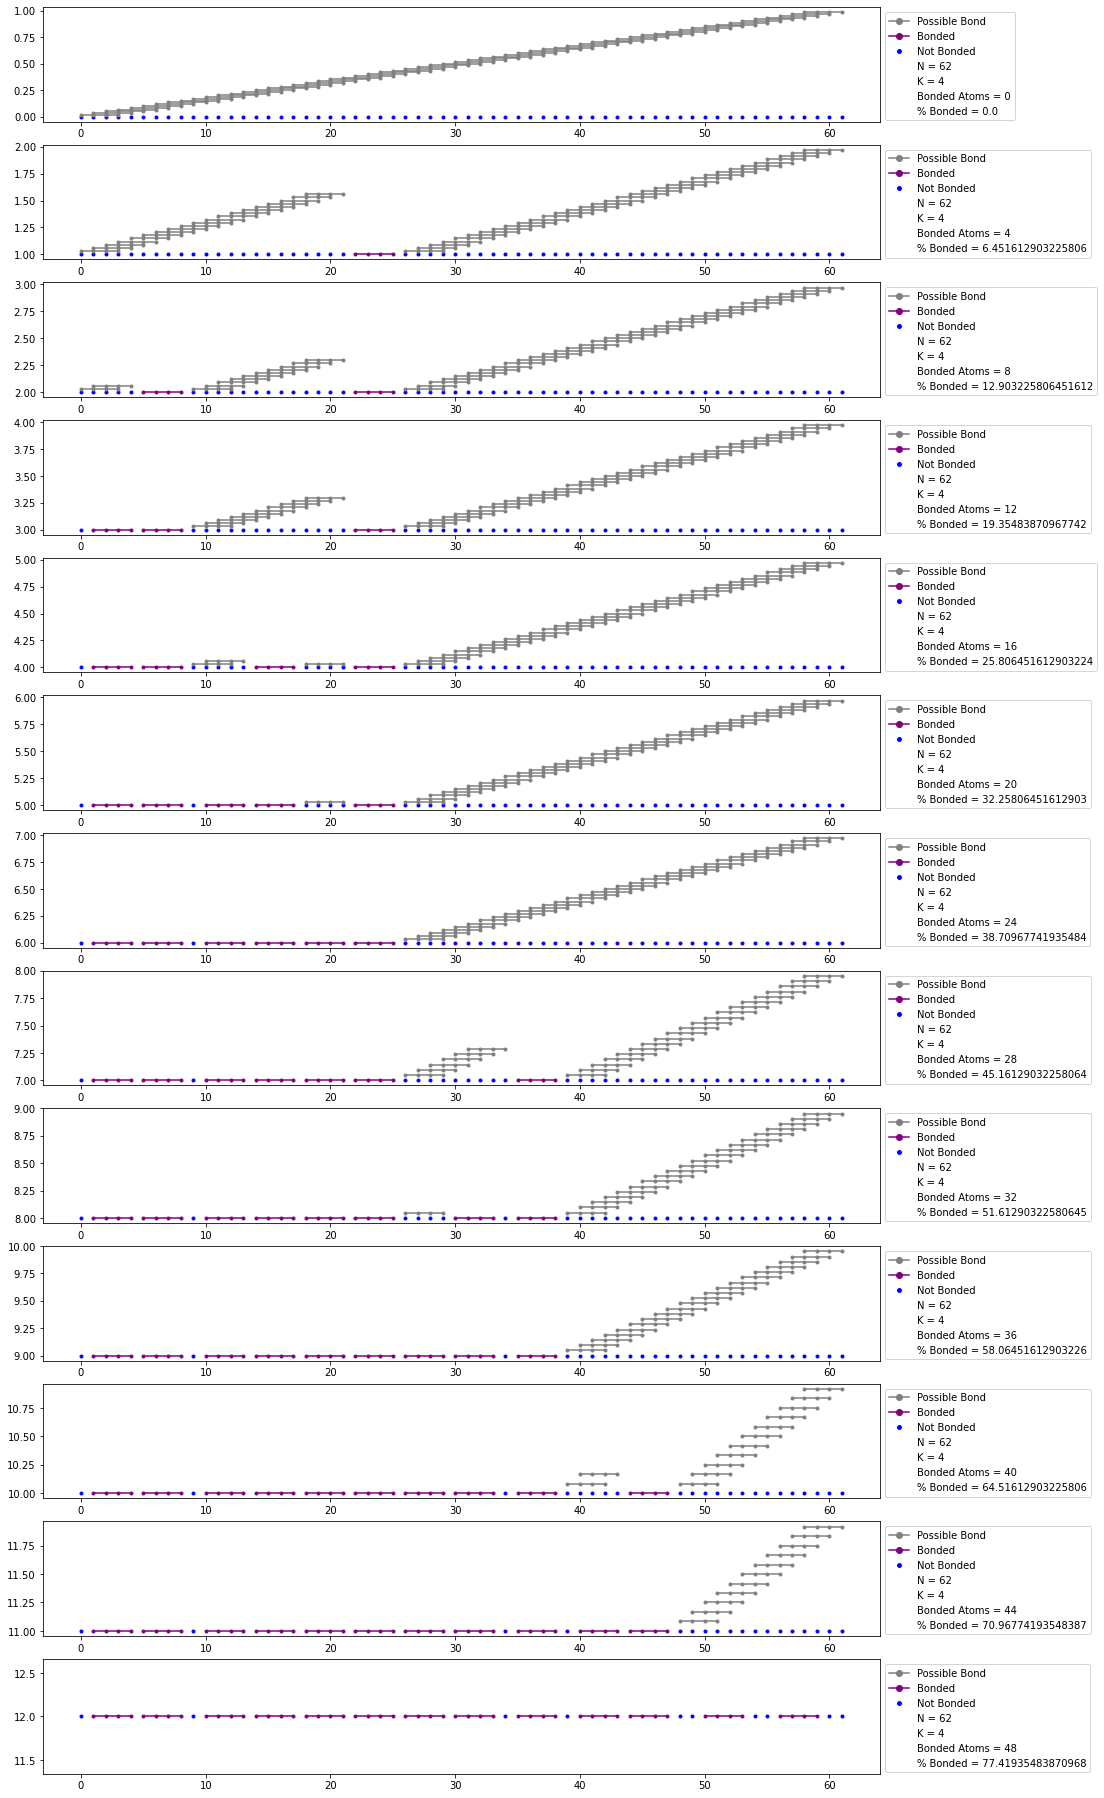

In [ ]:
#@title Run Experiment

k = random.randrange(2,5)
n = random.randrange(k,20*k)
steps = create_steps(run_recursive(n,k))
render_experiment(steps)


This 1-dimensional model is sometimes called the Parking Problem,
which is known by the pioneering works by Flory (1939), Renyi (1958), Dvoretzky and Robbins (1962)
> "Random Sequential Packing of Cubes" https://www.worldscientific.com/worldscibooks/10.1142/7777

> https://en.wikipedia.org/wiki/Paul_Flory -  American chemist and Nobel laureate who was known for his work in the field of polymers, or macromolecules.

> [https://en.wikipedia.org/wiki/Alfred_Renyi](https://en.wikipedia.org/wiki/Alfr%C3%A9d_R%C3%A9nyi) - a Hungarian mathematician,  he is also known for his parking constants, which characterize the solution to the following problem: given a street of some length and cars of unit length parking on a random free position on the street, what is the mean density of cars when there are no more free positions? The solution to that problem is asymptomatically equal to 0.7475979 (sequence A050996 in the OEIS). Thus, random parking is 25.2% less efficient than optimal packing

> https://en.wikipedia.org/wiki/Aryeh_Dvoretzky - winner of the 1973 Israel Prize in Mathematics.

> https://en.wikipedia.org/wiki/Herbert_Robbins - American mathematician and statistician. He did research in topology, measure theory, statistics, and a variety of other fields.

Why's this problem interesting in the first place?  
in a sense it is a simplified model of repeating meterials, for example crystals. crystals form "crystalic structure" that is repeating over and over in space.  
sadly because of the independent nature of these bonds formation they can result in "holes" and other fractures that can weaken certain material properties and such.

I am no Material Scientist but I would expect that knowing the ideal factor of bonds is useful for property prediction, somehow.

We can start by trying to see if this portion seem to converge at all:
(And it does)

In [ ]:
#@title Mean value of a few experiments
import numpy
import matplotlib.pyplot as plt
from collections import defaultdict
orDict = defaultdict(list)
def vars():
  for x in range(4,19):
    for k in range(4,10):
      # for n in numpy.floor(np.logspace(8, 19, num=7,base=2)):      
      for n in numpy.floor(numpy.linspace(max(2**(x-1),k^2),2**x,3)):
        if n>k:
          for exp in range(15):
              yield (n,k) 
results = batch_exp(vars(),300)
for k, point in results:
    orDict[k].append(point)

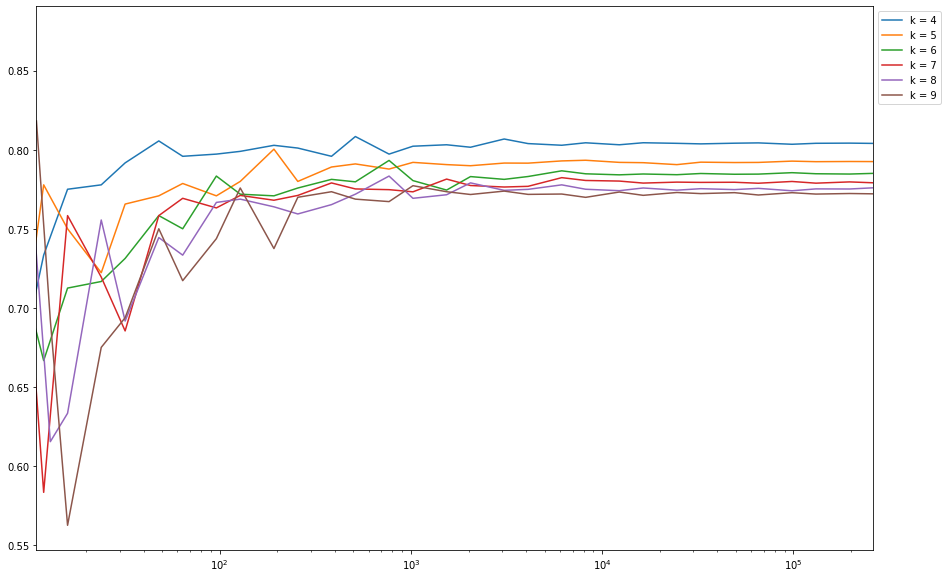

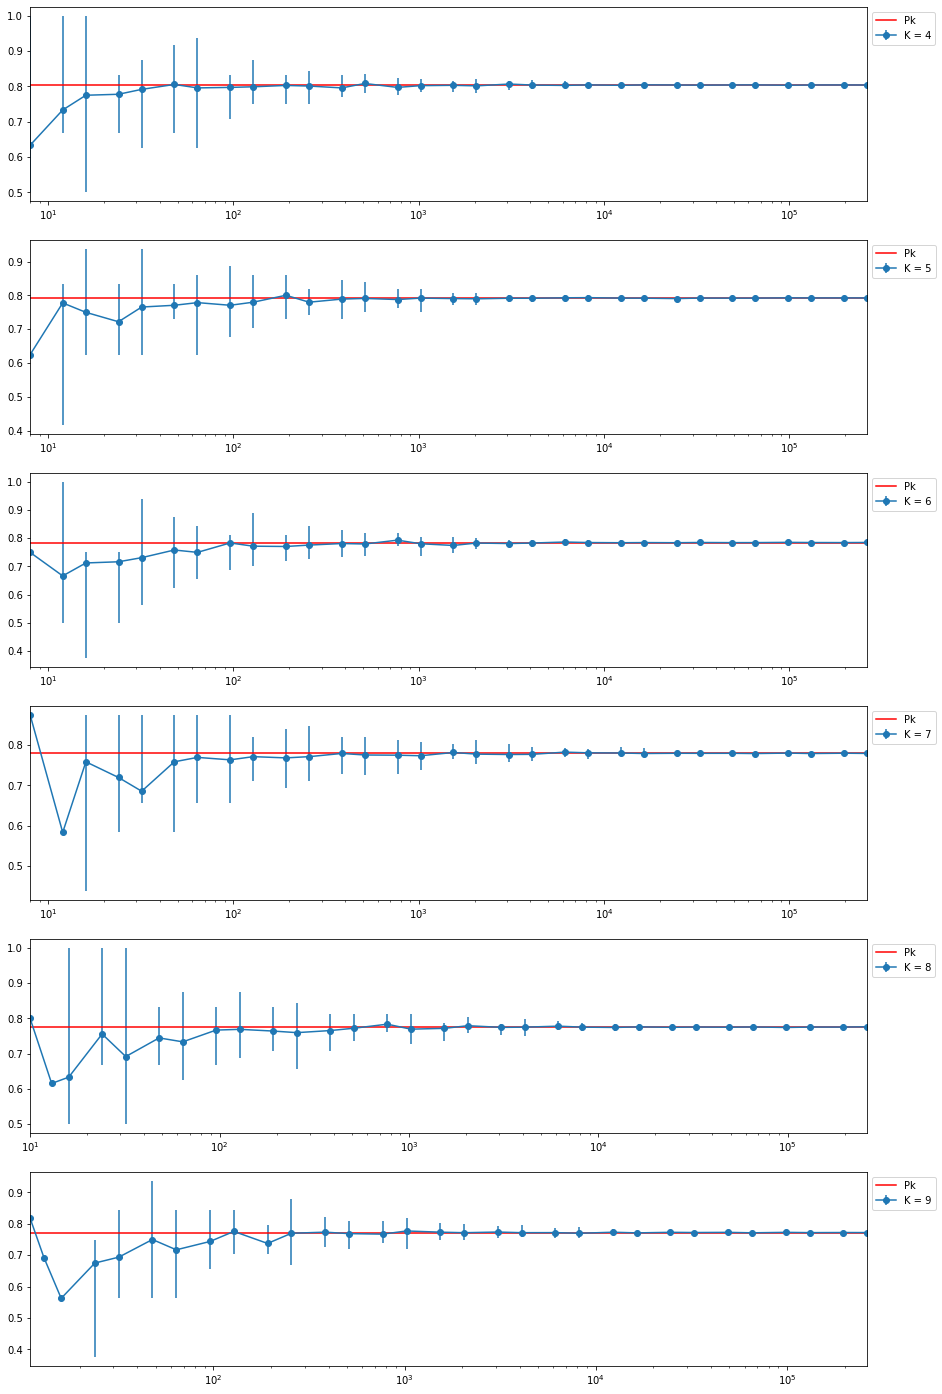

In [ ]:
#@title
allfig, allax = plt.subplots()
fig, axes = plt.subplots(len(orDict))

# intersection_x = None
# for key in orDict.keys():
#   x,y = list(zip(*orDict[key]))
#   if not intersection_x:
#     intersection_x = set(x)
#   else:
#     intersection_x = intersection_x.intersection(x)
# maxx = max(intersection_x)
# aa = []

for ax,key in zip(axes,orDict.keys()):
  x,y = list(zip(*orDict[key]))
  setx = set(x) #- set(range(2*k**2))
  Meanx, Meany = zip(*sorted((xVal, numpy.mean([yVal for a, yVal in zip(x, y) if xVal==a])) for xVal in setx))
  Maxx, Maxy = zip(*sorted((xVal, numpy.max([yVal for a, yVal in zip(x, y) if xVal==a])) for xVal in setx))
  Minx, Miny = zip(*sorted((xVal, numpy.min([yVal for a, yVal in zip(x, y) if xVal==a])) for xVal in setx))
  Meany,Maxy,Miny = numpy.array(Meany),numpy.array(Maxy),numpy.array(Miny) 
  lowErr = Meany-Miny
  highErr = Maxy-Meany
  ax.set_xlim([sorted(setx)[0], sorted(setx)[-1]])
  # ax.set_ylim([pk(key)-0.01,pk(key)+0.01])
  allax.plot(Meanx,Meany,label="k = {}".format(key))
  ax.errorbar(sorted(list(setx)),Meany,yerr=[lowErr,highErr],fmt='-o',label="K = {}".format(key))
  ax.axhline(y=pk(key), color='r', linestyle='-',label="Pk")
  ax.legend(bbox_to_anchor=(1, 1),loc='upper left')
  ax.set_xscale('log')
allax.legend(bbox_to_anchor=(1, 1),loc='upper left')
allax.set_xlim([sorted(setx)[0], sorted(setx)[-1]])
# allax.set_ylim([min(pk(list(orDict.keys())))-0.01,max(pk(list(orDict.keys())))+0.01])
fig.set_size_inches(15, 5*5);
allfig.set_size_inches(15,2*5);
allax.set_xscale('log')



Now we can check how "the average portion of bonded atoms as a function of $k$" looks like:

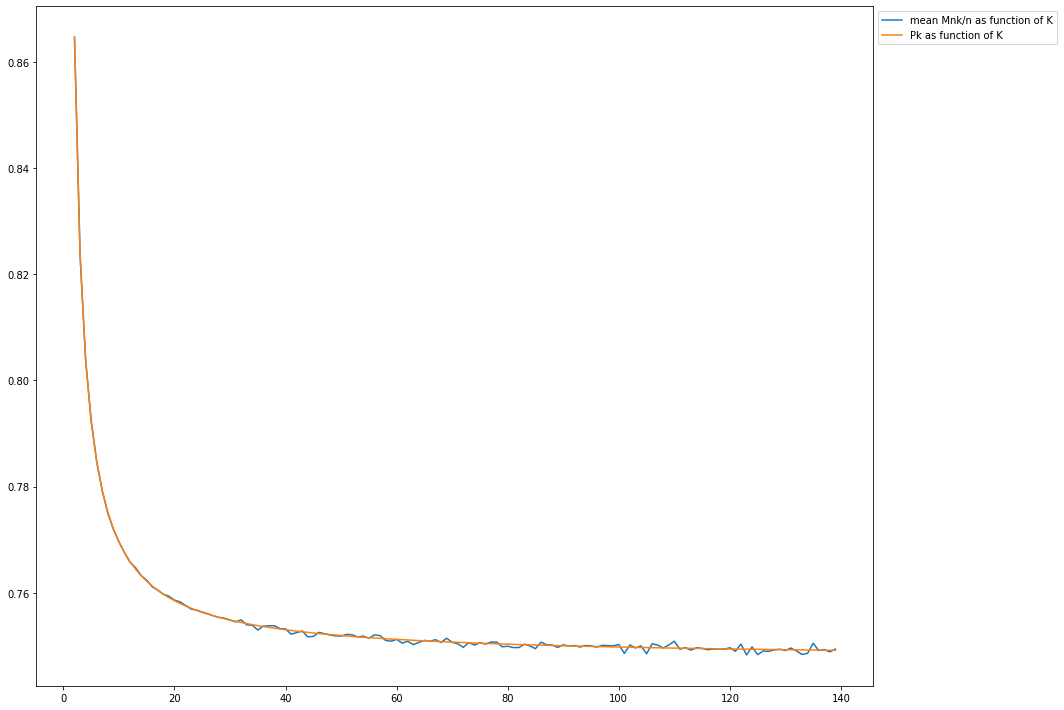

In [ ]:
#@title mean value as function of k
##@markdown ------add calculation by intergral---------add calculation by growing n
def vars():
    n = 2**20
    for k in range(2,140):
      for exp in range(15):
        yield (n,k)
from collections import defaultdict
orDict = defaultdict(list)
results = batch_exp(vars(),300)

for k, point in results:
    orDict[k].append(point)
# allfig, allax = plt.subplots()
#fig, axes = plt.subplots(len(orDict))

a = []
for key in orDict.keys():
  x,y = list(zip(*orDict[key]))
  setx = set(x) #- set(range(2*k**2))
  Meanx, Meany = zip(*sorted((xVal, numpy.mean([yVal for a, yVal in zip(x, y) if xVal==a])) for xVal in setx))
  a.append((key,Meany[0]))
# a = [(k,value) for (k,(x,value)) in ]
aafigure,aaax = plt.subplots()
aaax.plot(*(zip(*a)),label="mean Mnk/n as function of K")


#sum exp

t = np.array(list(orDict.keys()))
aaax.plot(t,pk(t),label="Pk as function of K")
aaax.legend(bbox_to_anchor=(1, 1),loc='upper left')
aafigure.set_size_inches(15, 2.5*5);



It looks to be some kind of exponential decay, but is it?

Our grand result:
$$
p_k:=  \lim_{n\to\infty}\frac{EM_{n;k}}{n} = 
k\cdot e^{\textstyle -2\sum_{j=1}^{k-1}\frac{1}{j}}
\cdot 
\int_0^1 e^{2 \textstyle \sum_{j=1}^{k-1}\frac{s^j}{j}}ds
$$


There are 3 main components to this proof with a few tricks a long the way.  
1) Figuring out what's $p_k$, Calculating it exactly  
2) What the heck?? a differential equation?  
3) Showing we probabalistically converge to it  

## Disecting the problem

### Tying to calculate the expected value directly

*   Expected Value: $${\displaystyle \mu = \operatorname {E} [X] =\sum _{i=1}^{n}p_{i}x_{i} =\sum _{i=1}^{k}x_{i}\,p_{i}=x_{1}p_{1}+x_{2}p_{2}+\cdots +x_{k}p_{k}.}
$$
We can try and calculate the expected value, it should be simple enough?
$$
EM_{n;k}=H_n^{(k)} =
  \begin{cases}
    0 & \text{if }n\in[k-1] \\
    k & \text{if }n=k \\
    k+\frac{2}{n-k+1}\sum_{j=1}^{n-k-1}H_j^{(k)} & \text{otherwise}
  \end{cases}
$$
it is clear that if $n< k$ then we cannot bond at all and if $n = k$ then we can bond exactly once.
as for $n>k$, In the representation of the experiment we saw all the possible bonds, some of which overlap, some don't but all in all we have $n-k+1$ unique molecules to choose from.
$$EM_{n;k}=\displaystyle\sum^{n-k+1}_{j=1}P(B_j \text{ bonded})\cdot E(M_{n;k}|B_j \text{ bonded})$$
where $B_j$ is the event where the $'j'$ molecule is bonded. (assuming unified distrobution, could be even more interesting if this isn't unified)  
So, we have $k$ atoms bonding and the rest is recursive.  
We have $j-1$ atoms on the left "left" and $n+1-j-k$ atoms on the left "right" to bond.
$$
E(M_{n;k}|B_j \text{ bonded}) = k+E(M_{j-1;k}+M_{n+1-j-k;k}) = k+ H_{j-1}^{(k)} + H_{n+1-j-k}^{(k)}
$$
doing some algebra we get the result above.
<details>
$$EM_{n;k}=H_n^{(k)} = \sum^{n-k+1}_{j=1}P(B_j \text{ bonded})\cdot E(M_{n;k}|B_j \text{ bonded})
=\\
\frac{1}{n-k+1}\sum_{j=1}^{n-k+1}k+H^{(k)}_{j-1}+H^{(k)}_{n+1-j-k}
=\\
\frac{(n-k+1)k}{n-k+1}+\frac{1}{n-k+1}\sum_{j=1}^{n-k+1}H^{(k)}_{j-1}+H^{(k)}_{n-k+1-j}
=\\
k+\frac{1}{n-k+1}(H^{(k)}_{1-1}+H^{(k)}_{n-k+1-1}+H^{(k)}_{2-1}+H^{(k)}_{n-k+1-2}+...+H^{(k)}_{(n-k)-1}+H^{(k)}_{n-k+1-(n-k)}+H^{(k)}_{(n-k+1)-1}+H^{(k)}_{n-k+1-(n-k+1)})
=\\
k+\frac{1}{n-k+1}(H^{(k)}_{0}+H^{(k)}_{n-k}+H^{(k)}_{1}+H^{(k)}_{n-k-1}+...+H^{(k)}_{n-k-1}+H^{(k)}_{1}+H^{(k)}_{n-k}+H^{(k)}_{0})
=\\
k+\frac{2}{n-k+1}\sum_{j=1}^{n-k-1}H_j^{(k)}
$$
</details>

All good! or is it?
This recursive function relies on an increasing amount of previous iterations!!
But what if we define:
$$
S_n^{(k)} = \sum_{j=0}^{n} H_j^{(k)}
$$
we then get:
$n\ge k:$
$$
H^{(k)}_n = S_n^{(k)}-S_{n-1}^{(k)} = k+ \frac{2}{n-k+1}\cdot S^{(k)}_{n-k} \\
$$

$S_n^{(k)}$ seem more calculatable than $H_n^{(k)}$ as it relies on a constant number of previous iterations.
in this scenario we can attempt to search for the limit of an generating function and workout the series at a taylor expansion.
$$g(t)=\sum_{n=0}^{\infty}S_nt^n=\sum_{n=k}^{\infty}S_nt^n$$

### THE DIFFERENTIAL EQUATION

After some tiny amount of algebra
<details>
$$
S_n^{(k)}-S_{n-1}^{(k)} = k+ \frac{2}{n-k+1}\cdot S^{(k)}_{n-k} \\
(n-k+1)S_n - (n-k+1)S_{n-1} = k(n-k+1) + 2S_{n-k} \\
(n-k+1)S_n = (n-k+1)S_{n-1} + k(n-k+1) + 2S_{n-k}
$$

We hadn't defined the generating function for nothing, to appear somewhere so a good idea would be to multiply be $t^n$ and sum on all $n$.
$$ (n-k+1)S_nt^n = (n-k+1)S_{n-1}t^n + k(n-k+1)t^n + 2S_{n-k}t^n $$
$$ nS_nt^n-(k-1)S_nt^n= (n-1)S_{n-1}t^{n}-(k-2)S_{n-1}t^n + k(n-k+1)t^n + 2S_{n-k}t^n $$
Honestly I would quit here, the infinite sums seem to have multiples of $n$ and not be at all simple to solve but if by chance we see that
$$H_n \le n \implies S_n\le \frac{1}{2}n(n+1) \implies g(t) \text{ converges for } |t|< 1 $$
we can do a derivetive which might take care of these feral $n$'s:
$$|t|< 1: g'(t)=\sum_{n=k}^{\infty}nS_nt^{n-1}$$
reorder a little:
$$ t\cdot nS_nt^{n-1}-(k-1)S_nt^n= t^2\cdot (n-1)S_{n-1}t^{n-2}-(k-2)S_{n-1}t^n + k(n-k+1)t^n + 2S_{n-k}t^n $$
sum on all n:
$$ \sum_{n=k}^\infty t\cdot nS_nt^{n-1}-\sum_{n=k}^\infty(k-1)S_nt^n=\sum_{n=k}^\infty t^2\cdot (n-1)S_{n-1}t^{n-2}-\sum_{n=k}^\infty(k-2)S_{n-1}t^n + \sum_{n=k}^\infty k(n-k+1)t^n + \sum_{n=k}^\infty 2S_{n-k}t^n $$
take some constants out:
$$ t\cdot \sum_{n=k}^\infty nS_nt^{n-1}-(k-1)\sum_{n=k}^\infty S_nt^n=t^2\cdot\sum_{n=k}^\infty  (n-1)S_{n-1}t^{n-2}-(k-2)t\sum_{n=k}^\infty S_{n-1}t^{n-1} + k(-k+1)\sum_{n=k}^\infty t^n + k\sum_{n=k}^\infty (n)t^n + 2\cdot\sum_{n=k}^\infty S_{n-k}t^n $$
we are then left with a bunch of terms.
* $\displaystyle g'(t) = \sum_{n=k}^\infty nS_nt^{n-1}$
* $\displaystyle
\sum_{n=k}^\infty  (n-1)S_{n-1}t^{n-2} = (k-1)S_{k-1}t^{k-2}+\sum_{n=k+1}^\infty  (n-1)S_{n-1}t^{n-2} = 0+\sum_{m=k}^\infty  (m)S_{m}t^{m-1} = g'(t)
\\m:=k=n-1$  

we end up with:
$$tg'(t)-(k-1)g(t) = t^2g'(t)-(k-2)\cdot t\cdot g(t)-k(k-1)\cdot\sum_{n=k}^{\infty}t^n+kt\cdot\sum_{n=k}^\infty nt^{n-1}+2t^k\cdot g(t)$$
which is still quite... um. a mess. tough the last 2 terms seem to be simple enough and probably polynomial or fractional and it just to happen to be:
$$-k(k-1)\cdot\sum_{n=k}^{\infty}t^n+kt\cdot\sum_{n=k}^\infty nt^{n-1}
= \\
\frac{-k(k-1)\cdot t^k}{1-t} + kt\cdot \frac{(1-t)kt^{k-1}+t^k}{(1-t)^2}
=\\
\frac{kt^k}{(1-t)^2}
$$
because:
$$
|t|<1:  
(\frac{t^k}{1-t})'
=
(\sum_{n=k}^\infty t^{n})'
=
\sum_{n=k}^\infty nt^{n-1} = \frac{(1-t)kt^{k-1}+t^k}{(1-t)^2}$$
so:
$$tg'(t)-(k-1)g(t) = t^2g'(t)-(k-2)\cdot t\cdot g(t)+2t^k\cdot g(t)+\frac{kt^k}{(1-t)^2}
$$
reordering
$$tg'(t)-t^2g'(t) = [(k-1)-(k-2)\cdot t+2t^k]\cdot g(t)+\frac{kt^k}{(1-t)^2}
$$
$$
t(t-1)g'(t) = [(k-1)-(k-2)\cdot t+2t^k]\cdot g(t)+\frac{kt^k}{(1-t)^2}
$$
</details>
we end up with this differential equation.
$$
g'(t) = \frac{(k-1)-(k-2)\cdot t+2t^k}{t(t-1)} g(t)+\frac{kt^{k-1}}{(1-t)^3}
$$

#### We will solve for $g(t)$ but why. - A chain of limits

$\displaystyle \lim_{n\to\infty}\frac{H^{(k)}_n}{n}=2L\iff \lim_{n\to\infty}\frac{S^{(k)}_{n}}{n^2}=L \implies \lim_{t\to 1}(1-t)^3g(t)=2L$
this is because of two things:
* we previously saw that:
$$
H^{(k)}_n = S_n^{(k)}-S_{n-1}^{(k)} = k+ \frac{2}{n-k+1}\cdot S^{(k)}_{n-k} \\
\frac{H^{(k)}_n}{n} = \frac{k+ \frac{2}{n-k+1}\cdot S^{(k)}_{n-k}}{n} = \frac{k}{n}+\frac{2S^{(k)}_{n-k}}{n(n-k+1)} \\
$$
 * in the same manner we understand that 
 $\displaystyle \lim_{n\to\infty}\frac{S_n}{n^2} = L \iff \lim_{n\to\infty}\frac{S_n}{n(n-1)} = L$  

$\epsilon > 0$ then there exists $n_0$ such that for all $n>n_0$: 
$| \frac{S_n}{n(n-1)}-L |< \epsilon$
<details>
<summary>we sum over all n</summary>
$$
n_0< n:\\
L-\epsilon \le \frac{S_n}{n(n-1)}\le L+\epsilon\\
n(n-1)\cdot(L-\epsilon) \le S_n\le (L+\epsilon)\cdot n(n-1)\\
(L-\epsilon)\cdot n(n-1)t^n \le S_nt^n\le (L+\epsilon)\cdot n(n-1)t^n
$$
</details>  
$$\sum_{n=0}^{n_0}S_nt^n+(L-\epsilon)\cdot\sum_{n=n_0+1}^\infty n(n-1)t^n \le g(t) = \sum_{n=0}^\infty S_nt^n \le \sum_{n=0}^{n_0}S_nt^n+(L+\epsilon)\cdot\sum_{n=n_0+1}^\infty n(n-1)t^n\\
$$
notice that:
$$
\sum_{n=0}^\infty n(n-1)t^n = t^2(\sum_{n=0}^{\infty}t^n)'' = \frac{2t^2}{(1-t)^3}\\
\sum_{n=n_0+1}^\infty n(n-1)t^n = \frac{2t^2}{(1-t)^3} - \sum_{n=0}^{n_0} n(n-1)t^n\\
$$
<details>
$$\sum_{n=0}^{n_0}S_nt^n+(L-\epsilon)\cdot\frac{2t^2}{(1-t)^3} - \sum_{n=0}^{n_0} n(n-1)t^n \le g(t)\le\\ \sum_{n=0}^{n_0}S_nt^n+(L+\epsilon)\cdot\frac{2t^2}{(1-t)^3} - \sum_{n=0}^{n_0} n(n-1)t^n\\
$$  
$$(1-t)^3\sum_{n=0}^{n_0}S_nt^n+(L-\epsilon)\cdot{2t^2} - (1-t)^3\sum_{n=0}^{n_0} n(n-1)t^n \le {(1-t)^3}g(t) \le\\ (1-t)^3\sum_{n=0}^{n_0}S_nt^n+(L+\epsilon)\cdot{2t^2} - (1-t)^3\sum_{n=0}^{n_0} n(n-1)t^n
$$
<summary>taking the limit to 1 and subsituting</summary>
</details>

$$
2L-2\epsilon\le\liminf_{t\to 1}(1-t)^3g(t)\le\limsup_{t\to 1}g(t)\le 2L+2\epsilon\\
\lim_{t\to 1}(1-t)^3g(t)=2L
$$
this means that if we find a way to calculate $\displaystyle\lim_{t\to 1}(1-t)^3g(t)$ we have $L$.

#### Solving for $g(t)$

$$
g'(t) = \frac{(k-1)-(k-2)\cdot t+2t^k}{t(t-1)} g(t)+\frac{kt^{k-1}}{(1-t)^3}
$$
this normalized form is clearly a first order non-homogeneous differential equations, these kind of equations have a single closed solution for all non-singular values aka $\epsilon\in(0,1)$. we can calculate it by multiplying in with an integration factor.
* $\displaystyle g'(t) = a(t)g(t)+b(t)$
  * $\displaystyle a(t) = \frac{(k-1)-(k-2)\cdot t+2t^k}{t(t-1)}$
  * $\displaystyle b(t) = \frac{kt^{k-1}}{(1-t)^3}$
* $\displaystyle \mu(t) = e^{-\int_\epsilon^ta(r)dr}$
  * $\implies\mu'(t) = [-\int_\epsilon^ta(r)dr]' \cdot e^{-\int_\epsilon^ra(r)dr} = -a(t) \cdot e^{-\int_\epsilon^ra(r)dr} =-a(t)\mu(t)$  
$$\mu(t)g'(t) = \mu(t)a(t)g(t)+\mu(t)b(t)\\
\mu(t)g'(t)-\mu(t)a(t)g(t) = \mu(t)b(t)\\
\mu(t)g'(t)+\mu'(t)g(t) = \mu(t)b(t)\\
[\mu(t)g(t)]' = \mu(t)b(t)\\
$$  

then integrating both sides we get:
from $\epsilon$ to $t$, $t\in(\epsilon,1)$
$$
\mu(t)g(t) - \mu(\epsilon)g(\epsilon) = \int^t_\epsilon b(s)\mu(s)ds\\
\mu(\epsilon) = e^{-\int_\epsilon^\epsilon a(r)dr}=e^0=1\\
\mu(t)g(t) = \int^t_\epsilon b(s)\mu(s)ds + g(\epsilon)\\
g(t) = \int^t_\epsilon b(s)\mu(s)ds / \mu(t) + g(\epsilon) / \mu(t)\\
$$
<details>
$$
g(t) = \int^t_\epsilon b(s)\mu(s)ds \cdot e^{\int_\epsilon^ta(r)dr} + g(\epsilon)e^{\int_\epsilon^ta(r)dr}
=\\
\int^t_\epsilon b(s)e^{-\int_\epsilon^sa(r)dr}ds \cdot e^{\int_\epsilon^ta(r)dr} + g(\epsilon)e^{\int_\epsilon^ta(r)dr} 
=\\
\int^t_\epsilon b(s)e^{-\int_\epsilon^sa(r)dr}\cdot e^{\int_\epsilon^ta(r)dr}ds + g(\epsilon)e^{\int_\epsilon^ta(r)dr} 
=\\
\int^t_\epsilon b(s)e^{-\int_\epsilon^sa(r)dr+{\int_\epsilon^ta(r)dr}}ds + g(\epsilon)e^{\int_\epsilon^ta(r)dr} 
=\\
\int^t_\epsilon b(s)e^{\int_s^\epsilon a(r)dr+{\int_\epsilon^ta(r)dr}}ds + g(\epsilon)e^{\int_\epsilon^ta(r)dr} 
=\\
\int^t_\epsilon b(s)e^{\int_s^t a(r)dr}ds + g(\epsilon)e^{\int_\epsilon^ta(r)dr} \\
$$
</details>
$$
g(t) = \int^t_\epsilon b(s)e^{\int_s^t a(r)dr}ds + g(\epsilon)e^{\int_\epsilon^ta(r)dr}\\ t\in(\epsilon,1)
$$


Getting rid of $\epsilon$
$$
g(0) = \lim_{\epsilon\to 0}g(t)
=\\
\lim_{\epsilon\to 0}(\int^t_\epsilon b(s)e^{\int_s^t a(r)dr}ds + g(\epsilon)e^{\int_\epsilon^ta(r)dr})
=\\
\lim_{\epsilon\to 0}(\int^t_\epsilon b(s)e^{\int_s^t a(r)dr}ds)
+
\lim_{\epsilon\to 0}g(\epsilon)e^{\int_\epsilon^ta(r)dr}
$$

##### Evaluating the constant factor $\displaystyle\lim_{\epsilon\to 0}g(\epsilon)e^{\int_\epsilon^ta(r)dr}=0$



by the definition of $\displaystyle g(t)=\sum_{n=k}^{\infty}S_nt^n$ we can see that $g(\epsilon)= O(\epsilon^k)$ as $\epsilon \to 0 \implies \displaystyle\lim_{\epsilon\to 0}\frac{g(\epsilon)}{\epsilon^k}=C$
because the lowest term has the degree is $k$ aka $\epsilon^k$


We can try to put a cieling on $e^{\int_\epsilon^{t_0} a(r)dr}$ then:

$$
\lim_{t\to 0}t\cdot a(t) = k-1\\
$$
<details>
$$
\lim_{t\to 0}(t\cdot\frac{(k-1)-(k-2)\cdot t+2t^k}{t(t-1)})
=\\
\lim_{t\to 0}(\frac{(k-1)-(k-2)\cdot t+2t^k}{(t-1)})=\\
\frac{(k-1)-(k-2)\cdot 0+2\cdot(0^k)}{(0-1)}=
k-1
$$
</details>

then exists $t_0>0$ such that for $0< t\le t_0$: $a(t)\le \frac{k-\frac{1}{2}}{t}$

so if we take $\epsilon$ to be less than $t_0$

$$e^{\int_\epsilon^{t_0} a(r)dr}\le e^{\int_\epsilon^{t_0} \frac{k-\frac{1}{2}}{r} dr} = (\frac{t_0}{\epsilon})^{(k-\frac{1}{2})}$$  
$\displaystyle \int_\epsilon^{t_0} \frac{k-\frac{1}{2}}{r} dr = (k-\frac{1}{2})\cdot \ln(|r|)\bigg|_\epsilon^{t_0} = (k-\frac{1}{2})\cdot (\ln(t_0)-\ln(\epsilon)) = (k-\frac{1}{2})\cdot \ln(\frac{t_0}{\epsilon}) = \ln((\frac{t_0}{\epsilon})^{(k-\frac{1}{2})})
$

with both of these facts combined we get 

$$\lim_{\epsilon\to 0}g(\epsilon)e^{\int_\epsilon^ta(r)dr}
=
\lim_{\epsilon\to 0}g(\epsilon)e^{\int_\epsilon^{t_0}a(r)dr}e^{\int_{t_0}^ta(r)dr}
=
e^{\int_{t_0}^ta(r)dr}\cdot\lim_{\epsilon\to 0}g(\epsilon)e^{\int_\epsilon^{t_0}a(r)dr}
\le\\
e^{\int_{t_0}^ta(r)dr}\cdot\lim_{\epsilon\to 0}g(\epsilon)(\frac{t_0}{\epsilon})^{(k-\frac{1}{2})} = 
e^{\int_{t_0}^ta(r)dr}\cdot\lim_{\epsilon\to 0}\frac{g(\epsilon)}{\epsilon^{k}}{t_0}^{(k-\frac{1}{2})}\cdot \epsilon^{\frac{1}{2}} =\\ 
e^{\int_{t_0}^ta(r)dr}\cdot {t_0}^{(k-\frac{1}{2})}\cdot\lim_{\epsilon\to 0}\frac{g(\epsilon)}{\epsilon^{k}}\cdot \epsilon^{\frac{1}{2}} = const\cdot 0 = 0
$$




##### Evaluating the functional part $\displaystyle\lim_{\epsilon\to 0}(\int^t_\epsilon b(s)e^{\int_s^t a(r)dr}ds)=k\frac{t^{k-1}}{(1-t)^{3}}e^{-2\sum_{j=1}^{k-1}\frac{t^j}{j}}\cdot\int^t_0 e^{2\sum_{j=1}^{k-1}\frac{s^j}{j}}ds$




$$a(t) = 
\frac{(k-1)-(k-2)\cdot t+2t^k}{t(t-1)} =
\frac{k-1}{t}+\frac{3}{1-t}-2(1+t+...+t^{k-2})$$
<details>
note that: $$\frac{t^{k-1}}{1-r} = \frac{1}{1-t}-(1+t+...+t^{k-2})$$
so:
$$
a(t)=\frac{(k-1)-(k-2)\cdot t+2t^k}{t(t-1)} =\\
\frac{k-1}{t}+\frac{1}{1-t}+\frac{2t^{k-1}}{t-1} =\\
\frac{k-1}{t}+\frac{1}{1-t}+\frac{2}{1-t}-2(1+t+...+t^{k-2}) =\\
\frac{k-1}{t}+\frac{3}{1-t}-2(1+t+...+t^{k-2})$$
</details>
$$\displaystyle e^{\int_s^t a(r)dr} =
(t^{k-1}(1-t)^{-3})e^{-2\sum_{j=1}^{k-1}\frac{t^j}{j}}
\cdot
\int^t_\epsilon \frac{ks^{k-1}}{(1-s)^3} 
s^{1-k}(1-s)^{3})e^{2\sum_{j=1}^{k-1}\frac{s^j}{j}}
ds$$
<details>
$$
\int^ta(r)dr =
(k-1)\ln(t)-3\ln(1-t)-2\sum_{j=1}^{k-1}\frac{t^j}{j}
=\\
\ln(t^{k-1})+\ln((1-t)^{-3})-2\sum_{j=1}^{k-1}\frac{t^j}{j}
=\\
\ln(t^{k-1}(1-t)^{-3})-2\sum_{j=1}^{k-1}\frac{t^j}{j}
$$
$$e^{\int_s^t a(r)dr} =
e^{\ln(t^{k-1}(1-t)^{-3})-2\sum_{j=1}^{k-1}\frac{t^j}{j}}
\cdot
e^{-\ln(s^{k-1}(1-s)^{-3})+2\sum_{j=1}^{k-1}\frac{s^j}{j}}
=\\
(t^{k-1}(1-t)^{-3})e^{-2\sum_{j=1}^{k-1}\frac{t^j}{j}}
\cdot
(s^{1-k}(1-s)^{3})e^{2\sum_{j=1}^{k-1}\frac{s^j}{j}}
$$
</details>



$$\int^t_\epsilon b(s)e^{\int_s^t a(r)dr}ds = k\frac{t^{k-1}}{(1-t)^{3}}e^{-2\sum_{j=1}^{k-1}\frac{t^j}{j}}
\cdot
\int^t_\epsilon
e^{2\sum_{j=1}^{k-1}\frac{s^j}{j}}ds$$
<details>
$$b(t) = \frac{kt^{k-1}}{(1-t)^3}$$

$$\int^t_\epsilon b(s)e^{\int_s^t a(r)dr}ds
=\\
\int^t_\epsilon \frac{ks^{k-1}}{(1-s)^3} 
(t^{k-1}(1-t)^{-3})e^{-2\sum_{j=1}^{k-1}\frac{t^j}{j}}
\cdot
(s^{1-k}(1-s)^{3})e^{2\sum_{j=1}^{k-1}\frac{s^j}{j}}
ds
=\\
(t^{k-1}(1-t)^{-3})e^{-2\sum_{j=1}^{k-1}\frac{t^j}{j}}
\cdot
\int^t_\epsilon  
ke^{2\sum_{j=1}^{k-1}\frac{s^j}{j}}
ds
=\\
k\frac{t^{k-1}}{(1-t)^{3}}e^{-2\sum_{j=1}^{k-1}\frac{t^j}{j}}
\cdot
\int^t_\epsilon  
e^{2\sum_{j=1}^{k-1}\frac{s^j}{j}}
ds$$
</details>

taking the limit of $\epsilon \to 0$ we get 

$$\lim_{\epsilon\to 0}(\int^t_\epsilon b(s)e^{\int_s^t a(r)dr}ds)
=
\lim_{\epsilon\to 0}
k\frac{t^{k-1}}{(1-t)^{3}}e^{-2\sum_{j=1}^{k-1}\frac{t^j}{j}}
\cdot
\int^t_\epsilon  
e^{2\sum_{j=1}^{k-1}\frac{s^j}{j}}
ds
=\\
k\frac{t^{k-1}}{(1-t)^{3}}e^{-2\sum_{j=1}^{k-1}\frac{t^j}{j}}
\cdot
\int^t_0 
e^{2\sum_{j=1}^{k-1}\frac{s^j}{j}}
ds
$$

##### $\displaystyle g(t) = k\frac{t^{k-1}}{(1-t)^{3}}e^{-2\sum_{j=1}^{k-1}\frac{t^j}{j}}\cdot \int^t_0 e^{2\sum_{j=1}^{k-1}\frac{s^j}{j}}ds\\t\in[0,1)$
this is almost our grand result:
$$
p_k:=  \lim_{n\to\infty}\frac{EM_{n;k}}{n} = \lim_{t\to 1}(1-t)^3g(t) =
k\cdot e^{\textstyle -2\sum_{j=1}^{k-1}\frac{1}{j}}
\cdot 
\int_0^1 e^{2 \textstyle \sum_{j=1}^{k-1}\frac{s^j}{j}}ds
$$

#### Showing that the $\displaystyle \lim_{n\to\infty}\frac{S_n}{n^2}$ exists

if this series is convergent then the limit exists.
$$\frac{S_n}{n^2}=\sum_{j=2}^{n}(\frac{S_j}{j^2}-\frac{S_{j-1}}{(j-1)^2})$$
we had:
$$S_n-S_{n-1} = k+ \frac{2}{n-k+1}\cdot S_{n-k}$$
<details>
<summary>thus:</summary>
$$\frac{S_n}{n^2}-\frac{S_{n-1}}{n^2} = \frac{k}{n^2}+ \frac{2}{n^2(n-k+1)}\cdot S_{n-k}$$
$$\frac{S_n}{n^2}-\frac{S_{n-1}}{n^2}-\frac{S_{n-1}}{(n-1)^2} = -\frac{S_{n-1}}{(n-1)^2}+\frac{k}{n^2}+ \frac{2}{n^2(n-k+1)}\cdot S_{n-k}$$
$$\frac{S_n}{n^2}-\frac{S_{n-1}}{(n-1)^2} = \frac{S_{n-1}}{n^2}-\frac{S_{n-1}}{(n-1)^2}+\frac{k}{n^2}+ \frac{2}{n^2(n-k+1)}\cdot S_{n-k}
=\\
\frac{2n-1}{n^2(n-1)^2}\cdot S_{n-1}+\frac{k}{n^2}+ \frac{2}{n^2(n-k+1)}\cdot S_{n-k}
=\\
\frac{2n-1}{n^2(n-1)^2}\cdot S_{n-1}+\frac{k}{n^2}+\frac{2}{n^2(n-k+1)}\cdot S_{n-1} + \frac{2}{n^2(n-k+1)}\cdot(H_{n-k+1}+...+H_{n-1})
$$
</details>
$$
\frac{S_n}{n^2}-\frac{S_{n-1}}{(n-1)^2}=
\frac{(2k-5)n+3-k}{n^2(n-1)^2(n-k+1)}\cdot S_{n-1}+\frac{k}{n^2}+ \frac{2}{n^2(n-k+1)}\cdot(H_{n-k+1}+...+H_{n-1})
$$
and since $H_n< n \implies S_n<\frac{n(n+1)}{2}$ there exists a $0< C$ that both:
*   $$| \frac{(2k-5)n+3-k}{n^2(n-1)^2(n-k+1)} | \cdot S_{n-1} \le \frac{C}{n^2}\\
$$
*   $$
\frac{2}{n^2(n-k+1)}\cdot(H_{n-k+1}+...+H_{n-1})\le \frac{C}{n^2}
$$
so:
$$
\frac{S_n}{n^2}-\frac{S_{n-1}}{(n-1)^2}\le\frac{2C+k}{n^2}
$$
and since we know that $\displaystyle\sum_{n=1}^\infty\frac{1}{n^2}$ converges it means that our desired sum converges. thus the limit does indeed exists.

###The law of large numbers

let's remember what are:
*   Expected Value:
${\displaystyle \mu = \operatorname {E} [X] =\sum _{i=1}^{n}p_{i}x_{i} =\sum _{i=1}^{k}x_{i}\,p_{i}=x_{1}p_{1}+x_{2}p_{2}+\cdots +x_{k}p_{k}.}
$
*   Variance:
$ \sigma ^{2}=\operatorname {Var} (X)=\sum _{i=1}^{n}p_{i}\cdot (x_{i}-\mu )^{2}$  
  * We also know that:
$\sigma^2(X) = E(X^2) - (EX)^2$
<details>
<summary>
Reminder
</summary>
$$
\sigma^2[X] = E[(X-\mu)^2] =  E[(X-E[X])^2]
= \\
E[X^2-2XE[X]+E[X]^2]
=\\
E[X^2]-2E[X]E[X]+E[X]^2
=\\
E[X^2]-E[X]^2
$$
</details>
* The weak law of large numbers: $\forall\epsilon>0: \displaystyle\lim_{n\to\infty}P(|\frac{\sum^n_{i=1}X_i}{n}-\mu|>\epsilon)=0$

Even though we calculated what seem to be the expected value there is no promise we tend to it.
$$
\lim_{n\to\infty} P(|\frac{M_{n;k}}{n}-\frac{EM_{n;k}}{n}| \ge \epsilon)=0
$$
or rather,
$$
\lim_{n\to\infty} P(|\frac{M_{n;k}}{n}-p_k| \ge \epsilon)=0
$$
this will mean we tend to tend to the expected value.

If these were to happen we will be good:  
We proved above:
$$
H_n^{(k)} := EM_{n;k} = p_kn + o(n) \\ \text{as }n\to \infty 
$$
* Note that:
$$
\lim_{n\to\infty}\frac{H_n^{(k)}}{n} - p_k = 0 \\ \text{as }n\to \infty 
$$

We'll prove later that the 2nd moment behaves:
$$
L_n^{(k)} := EM^2_{n;k} = p^2_kn^2 + o(n^2) \\ \text{as }n\to \infty 
$$

Let's choose X to be the random variable: $$X = \frac{M_{(n;k)}}{n}$$

$$
E[X] = \frac{H^{(k)}_n}{n} = p_k + o(1) \\
\text{as }n\to \infty 
$$
$$
\sigma^2(X)  = E(X^2) - E(X)^2 = \frac{L^{(k)}_n}{n^2} - \frac{(H^{(k)}_n)^2}{n^2} = (p_k)^2+o(1)-(p_k+o(1))^2 = o(1) \\
\text{as } n \to \infty
$$

Chebyshev's inequality says that:
$$
P(|X-E[X]|\ge \delta)\le\frac{\sigma^2(X)}{\delta^2} \\
\text{ for any }\delta > 0
$$
<details>
Chebyshev's inequality
Let X be a random variable with finite expected value μ then:
$$P(|X-\mu|\ge k\sigma)\le\frac{1}{k^2}\\
\text{for any } k>0
$$
or in other words:
$$
\text{let } k = \frac{\delta}{\sigma(X)} \\
\frac{1}{k} = \frac{\sigma(X)}{\delta} , \delta = \sigma(X)\cdot k \\
$$

</details>

$$\implies \forall\delta>0 : 0\le P(|\frac{M_{n;k}}{n}-\frac{EM_{n;k}}{n}| \ge \delta) \le \frac{o(1)}{\delta^2}\\ \text{as } n\to\infty$$
$$\implies \lim_{n\to\infty} P(|\frac{M_{n;k}}{n}-\frac{EM_{n;k}}{n}| \ge \delta) = 0$$

$$
|\frac{M_{n;k}}{n}-p_k|
=
|\frac{M_{n;k}}{n}-\frac{H^{(k)}_{n}}{n}+\frac{H^{(k)}_{n}}{n}-p_k|
\le
|\frac{M_{n;k}}{n}-\frac{H^{(k)}_{n}}{n}|+|\frac{H^{(k)}_{n}}{n}-p_k|
$$


because we showed the $\frac{H_n}{n}$ converges to $p_k$
$$\forall\epsilon \exists n_\epsilon: \forall n>n_\epsilon \implies |\frac{H^{(k)}_{n}}{n}-p_k|\le\frac{\epsilon}{2}$$
$$\text{if } n>n_\epsilon \implies
|\frac{M_{n;k}}{n}-p_k|\ge \epsilon \iff |\frac{M_{n;k}}{n}-\frac{H^{(k)}_{n}}{n}|\ge\frac{\epsilon}{2}
$$

$$ \text{ for }n\ge n_\epsilon: \\
0\le P(|\frac{M_{n;k}}{n}-p_k| \ge \epsilon) \le P(|\frac{M_{n;k}}{n}-\frac{EM_{n;k}}{n}| \ge \frac{\epsilon}{2})
$$
$$\lim_{n\to\infty} P(|\frac{M_{n;k}}{n}-p_k| \ge \epsilon) = 0
$$





We see that for this setup, which is unrelated to our specific problem the law of large numbers holds. which we predicted with the graphs.


## The growth of the 2nd moment

if then we define 2 independence random variables $k+M_{j-1;k;1}, M_{n+1-j-k;k;2}$ we see that  
$$E[M_{j-1;k;1}M_{n+1-j-k;k;2}]=E[M_{j-1;k;1}]E[M_{n+1-j-k;k;2}]$$ because of the independance,thus, we calculate $L_n$ is a similar manner to $H_n$:
$$
E(M_{n;k}^2|B_j \text{ bonded}) = E(k+M_{j-1;k;1}+M_{n+1-j-k;k;2})^2 = k^2+ L_{j-1}^{(k)} + L_{n+1-j-k}^{(k)} + 2kH_{j-1}^{(k)} + 2kH_{n+1-j-k}^{(k)} + 2H_{j-1}^{(k)}H_{n+1-j-k}^{(k)}
$$

$$L_n = k^2+\frac{2}{n-k+1}\sum_{j=0}^{n-k}L_j+\frac{4k}{n-k+1}\sum_{j=0}^{n-k}H_j+\frac{2}{n-k+1}\sum_{j=0}^{n-k}H_jH_{n-k-j}
\text{ for }k\ge n
$$s
so we define $R_n$ just like $S_n$:
$$R_n = \sum_{j=0}^{n}L_j\\ R_j = 0 \forall j\in[k-1]$$
thus, just like $S_n$, $R_n$:
$$R_n=R_{n-1}+k^2+\frac{2}{n-k+1}R_{n-k}+\frac{4k}{n-k+1}S_{n-k}+\frac{2}{n-k+1}\sum_{j=0}^{n-k}H_jH_{n-k-j} \text{ for }n\ge k
$$  


<details>
$$
\lim_{n\to\infty}\frac{H_n}{n}=p_k \implies \forall\epsilon>0\exists n_\epsilon\forall n>n_e \implies (p_k-\epsilon)n\le H_n\le (p_k+\epsilon)n
\implies\\
(p_k-\epsilon)^2\sum_{n_\epsilon< j< n-n_\epsilon-k} j(n-k-j)+\sum_{0\le j\le n_\epsilon,n-n_\epsilon-k\le j\le n-k }H_jH_{n-k-j}\le\sum_{j=0}^{n-k}H_jH_{n-k-j}\le (p_k+\epsilon)^2\sum_{n_\epsilon< j< n-n_\epsilon-k} j(n-k-j)+\sum_{0\le j\le n_\epsilon,n-n_\epsilon-k\le j\le n-k }H_jH_{n-k-j}
$$  
but we know $H_j\le j$ for all $j$ $\implies$  
$$  
\sum_{0\le j\le n_\epsilon,n-n_\epsilon-k\le j\le n-k }H_jH_{n-k-j}
\le
2(n_\epsilon+1)n_\epsilon n
$$  
$$(n_\epsilon-0+1) + [(n-n_\epsilon-k)-(n-k)+1] = 2(n_\epsilon+1)$$  
note that:
$$\sum_{j=1}^nj^2 = \frac{1}{6}n(n+1)(2n+1)$$  
so:
$$\sum_{1\le j< n-n_\epsilon-k}j(n-k-j)=\\
(n-k)\cdot\sum_{1\le j< n-n_\epsilon-k}j-\sum_{1\le j< n-n_\epsilon-k}j^2
=\\
\frac{1}{2}(n-k)(n-n_\epsilon-k)(2(n-n_\epsilon-k-1)+1)=\frac{1}{6}n^3+o(n^3) \text{ as } n\to\infty
$$   
and unrelatedly:
$$\sum_{1\le j\le n_\epsilon} j(n-k-j) \le n\sum_{1\le j \le n_\epsilon}j \le \frac{1}{2}nn_\epsilon(n_\epsilon+1)$$  
thus:
$$\frac{1}{6}(p_k-\epsilon)^2
\le
\liminf_{n\to\infty}\frac{1}{n^3}\sum_{j=0}^{n-k}H_jH_{n-k-j}
\le
\limsup_{n\to\infty}\frac{1}{n^3}\sum_{j=0}^{n-k}H_jH_{n-k-j}
\frac{1}{6}(p_k+\epsilon)^2
$$  
</details>

*   $$
\lim_{n\to\infty}\frac{1}{n^3}\sum_{j=0}^{n-k}H_jH_{n-k-j}=\frac{p_k^2}{6}
$$


<details>
We saw:
$$
R_n=\frac{n-k+3}{n-k+1}R_{n-1}+k^2-\frac{2}{n-k+1}(L_{n-k+1}+...+L_{n-1})+\frac{4k}{n-k+1}S_{n-k}+\frac{2}{n-k+1}\sum_{j=0}^{n-k}H_{j}H_{n-k-j}
$$
but since $L_j\le j^2$ and $S_j\le \frac{1}{2}j(j+1)$
$$
\lim_{n\to\infty}\frac{W_n}{n^2}=\frac{p_k^2}{3}\\
R_n = \frac{n-k+3}{n-k+1}R_{n-1}+W_{n}\\
$$  
  <details>
  <summary>
  lemma
  </summary>
  $$
  \exists n_0, \{\hat R\}_{n=n_0}^\infty, 
  \hat R_n\le \frac{n-k-3}{n-k+1}\hat R_{n-1} + cn^2 \implies \limsup_{n\to\infty}\frac{\hat R}{n^3}\le c
  $$ 
  $$\exists n_0, \{\hat R\}_{n=n_0}^\infty, 
  \hat R_n\ge \frac{n-k-3}{n-k+1}\hat R_{n-1} + cn^2 \implies \liminf_{n\to\infty}\frac{\hat R}{n^3}\le c
  $$
  </details>
so
$$
\lim_{n\to\infty}\frac{R_n}{n^3} = \frac{p_k^2}{3}
$$  
$$L_n = k^2 + \frac{2}{n-k+1}R_{n-k}+\frac{4k}{n-k+1}S_{n-k}+\frac{2}{n-k+1}\sum_{j=0}^{n-k} H_jH_{n-k-j},n\ge k$$
</details>

*   $$\lim_{n\to\infty}\frac{L_n}{n^2} = 2\frac{p_k^2}{3}+2{p_k^2}{6} = p_k^2
$$